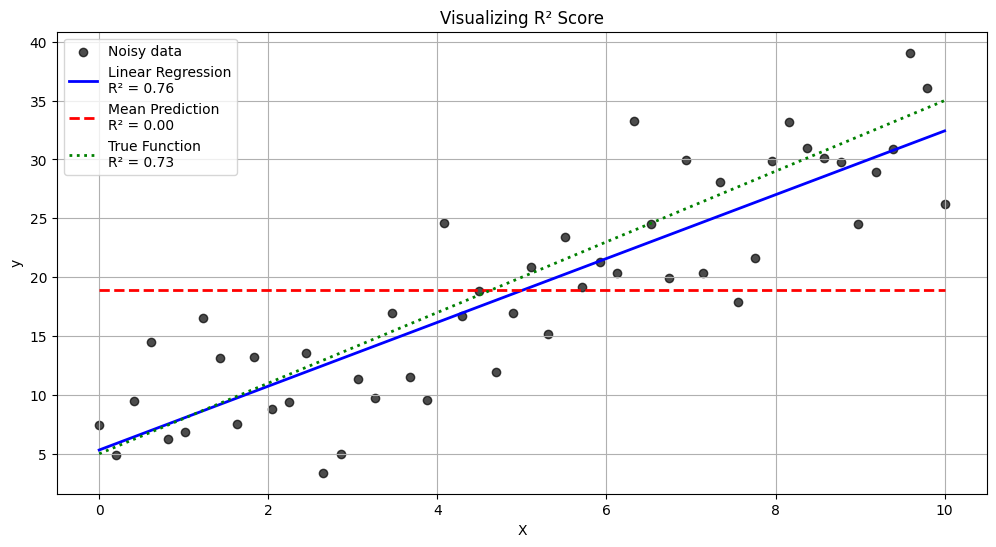

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y_true = 3 * X.squeeze() + 5
noise = np.random.normal(0, 5, size=y_true.shape)
y = y_true + noise  


model_good = LinearRegression()
model_good.fit(X, y)
y_pred_good = model_good.predict(X)
r2_good = r2_score(y, y_pred_good)

y_mean = np.full_like(y, np.mean(y))
r2_bad = r2_score(y, y_mean)

y_pred_true = y_true
r2_perfect = r2_score(y, y_pred_true)

plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='black', label='Noisy data', alpha=0.7)

plt.plot(X, y_pred_good, label=f'Linear Regression\nR² = {r2_good:.2f}', color='blue', linewidth=2)
plt.plot(X, y_mean, label=f'Mean Prediction\nR² = {r2_bad:.2f}', color='red', linestyle='--', linewidth=2)
plt.plot(X, y_pred_true, label=f'True Function\nR² = {r2_perfect:.2f}', color='green', linestyle=':', linewidth=2)

plt.title('Visualizing R² Score')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


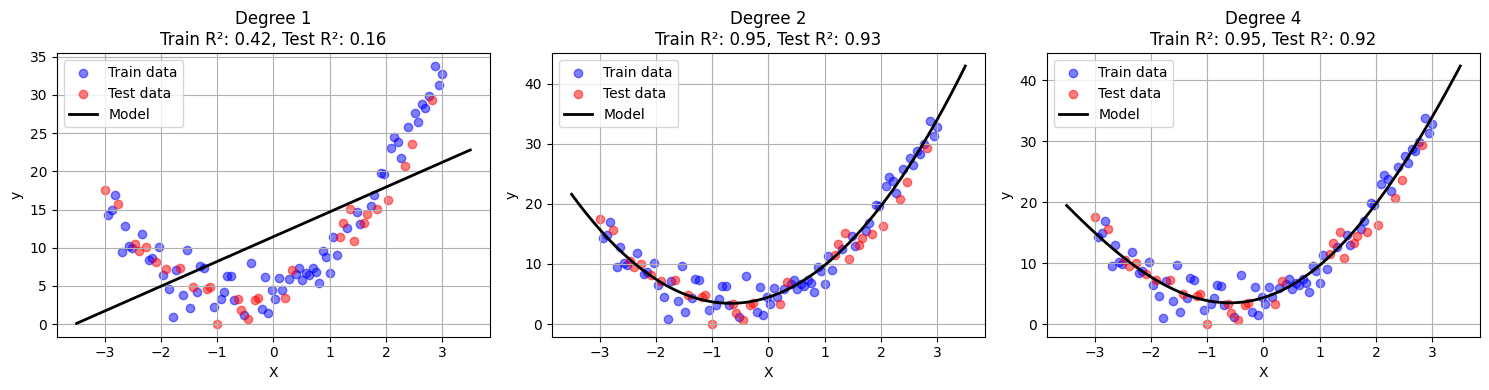

In [25]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split



np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2 * X.squeeze()**2 + 3 * X.squeeze() + 5 + np.random.normal(0, 2, size=X.shape[0])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


degrees = [1, 2, 4]


plt.figure(figsize=(15, 4))
x_plot = np.linspace(-3.5, 3.5, 300).reshape(-1, 1)

for i, degree in enumerate(degrees):

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    plt.subplot(1, 3, i + 1)
    plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Train data')
    plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Test data')
    plt.plot(x_plot, model.predict(x_plot), color='black', linewidth=2, label='Model')
    plt.title(f"Degree {degree}\nTrain R²: {r2_train:.2f}, Test R²: {r2_test:.2f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


### MAPE (Mean Absolute Percentage Error)

MAPE je prosječna apsolutna postotna pogreška. Pokazuje koliko je model u prosjeku odstupio od stvarnih vrijednosti izraženo u postocima. Korisno za razumijevanje relativne pogreške, ali nije dobro ako postoje nule u stvarnim vrijednostima jer dijelimo s $(y_i)$.

$$
MAPE = \frac{100\%}{n} \sum_{i=1}^n \left|\frac{y_i - \hat{y}_i}{y_i}\right|
$$


In [29]:


def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Primjer
y_true = [100, 200, 300, 400, 500]
y_pred = [110, 190, 310, 390, 480]

mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"MAPE: {mape:.2f}%")


MAPE: 4.97%


### Preciznost (Precision)

Preciznost mjeri udio ispravno predviđenih pozitivnih primjera među svima koje je model označio kao pozitivne.

$$
\text{Preciznost} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

---

### Odziv (Recall)

Odziv mjeri udio ispravno prepoznatih pozitivnih primjera u odnosu na sve stvarne pozitivne primjere.

$$
\text{Odziv} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

---

### Točnost (Accuracy)

Točnost pokazuje koliki je udio svih ispravno klasificiranih primjera.

$$
\text{Točnost} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$

---

### F1-mjera

F1-mjera je harmonijska sredina preciznosti i odziva. Koristi se kada želimo balansirati između ta dva.

$$
\text{F1} = 2 \cdot \frac{\text{Preciznost} \cdot \text{Odziv}}{\text{Preciznost} + \text{Odziv}}
$$


In [30]:
from sklearn.metrics import confusion_matrix


y_true = [0, 0, 1, 1, 0, 1, 0, 1, 1, 0]


y_pred = [0, 1, 1, 0, 0, 1, 0, 1, 0, 0]


cm = confusion_matrix(y_true, y_pred)

# cm looks like:
# [[TN FP]
#  [FN TP]]

TN, FP, FN, TP = cm.ravel()
print(cm)
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Negatives (TN): {TN}")


[[4 1]
 [2 3]]
True Positives (TP): 3
False Positives (FP): 1
False Negatives (FN): 2
True Negatives (TN): 4


In [31]:


# Točnost (Accuracy)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Preciznost (Precision)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0

# Odziv (Recall) ili senzitivnost (Sensitivity)
recall = TP / (TP + FN) if (TP + FN) != 0 else 0

# Stopa lažno pozitivnih (False Positive Rate - FPR)
fpr = FP / (FP + TN) if (FP + TN) != 0 else 0

# F1-score (harmonička sredina preciznosti i povrata)
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Accuracy (točnost): {accuracy:.3f}")
print(f"Precision (preciznost): {precision:.3f}")
print(f"Recall (senzitivnost): {recall:.3f}")
print(f"False Positive Rate (FPR): {fpr:.3f}")
print(f"F1-score: {f1_score:.3f}")


Accuracy (točnost): 0.700
Precision (preciznost): 0.750
Recall (senzitivnost): 0.600
False Positive Rate (FPR): 0.200
F1-score: 0.667


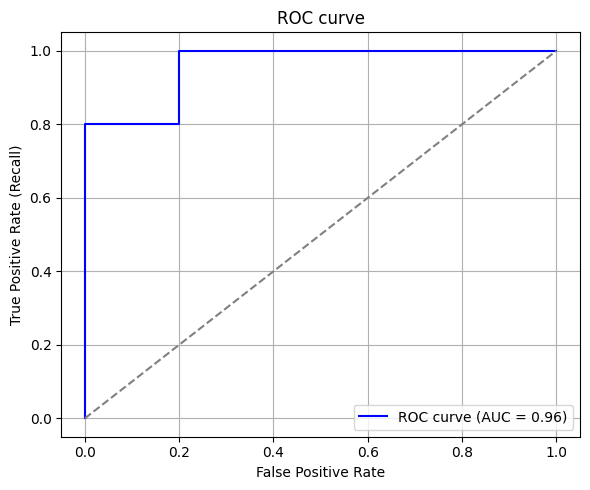

In [34]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Stvarne oznake (0 = negativno, 1 = pozitivno)
y_true = np.array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0])

# Vjerojatnosti da je uzorak pozitivan (ne predikcije 0/1!)
y_scores = np.array([0.1, 0.4, 0.35, 0.8, 0.2, 0.75, 0.05, 0.9, 0.6, 0.3])

# ROC krivulja
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Prikaz
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # linija slučajne klasifikacije
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


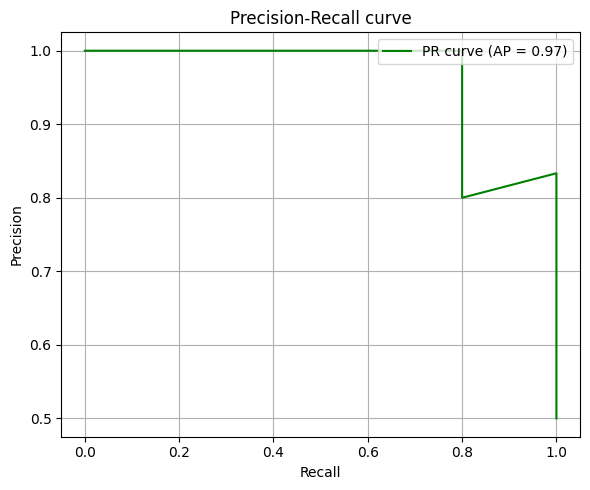

In [35]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Izračun PR krivulje
precision, recall, _ = precision_recall_curve(y_true, y_scores)
average_precision = average_precision_score(y_true, y_scores)

# Prikaz
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f"PR curve (AP = {average_precision:.2f})", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:

from sklearn.metrics import precision_score, recall_score, f1_score

y_true = [0]*35 + [1]*30 + [2]*35
y_pred = (
    [0]*10 + [1]*22 + [2]*3 +     
    [0]*3 + [1]*25 + [2]*2 +     
    [0]*4 + [1]*3 + [2]*28      
)


cm = confusion_matrix(y_true, y_pred)
print("Konfuzijska matrica:")
print(cm)


precision_micro = precision_score(y_true, y_pred, average='micro')
recall_micro = recall_score(y_true, y_pred, average='micro')
f1_micro = f1_score(y_true, y_pred, average='micro')


precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

print("\nMikro uprosječenje:")
print(f"Preciznost: {precision_micro:.3f}")
print(f"Recall: {recall_micro:.3f}")
print(f"F1-score: {f1_micro:.3f}")

print("\nMakro uprosječenje:")
print(f"Preciznost: {precision_macro:.3f}")
print(f"Recall: {recall_macro:.3f}")
print(f"F1-score: {f1_macro:.3f}")


Konfuzijska matrica:
[[10 22  3]
 [ 3 25  2]
 [ 4  3 28]]

Mikro uprosječenje:
Preciznost: 0.630
Recall: 0.630
F1-score: 0.630

Makro uprosječenje:
Preciznost: 0.646
Recall: 0.640
F1-score: 0.611
